In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearregression import * # Import my implemtation of Linear Regression
sns.set_theme()

 Let us generate data using  this
linear function for our model test, our model will try to estimate the weights and bias term
of this function, this function has 3 features so our weights will be 3 plus 1 bias term. Our function is truly linear, however it should be noted that in real world application you can hardly see any relationship that is wholely linear. But we will simulate data using this function, our function says: "I will generate dataset using some coefficients and intercept, please find those coefficients and intercept that I used to generate the dataset." So the coefficients are [7, 2, -5] and the intercept is 3. Our model will attempt to find these four values.

In [2]:
f = lambda x1, x2, x3: 7*x1 + 2*x2 - 5*x3 + 3

In [3]:
#Generate the training data using our function
np.random.seed(42)
X = np.random.randint(1, 100, size=(1_000, 3))
Y = f(X[:,0], X[:,1], X[:,2])
Y = Y[:, np.newaxis]
print(X[:5])
print(Y[:5])

[[52 93 15]
 [72 61 21]
 [83 87 75]
 [75 88 24]
 [ 3 22 53]]
[[ 478]
 [ 524]
 [ 383]
 [ 584]
 [-197]]


In [4]:
X.shape

(1000, 3)

In [5]:
Y.shape

(1000, 1)

In [6]:
#Generate test data using our function
X_test = np.random.random(size=(50, 3))
Y_true = f(X_test[:,0], X_test[:,1], X_test[:,2])
Y_true = Y_true[:, np.newaxis]

In [7]:
X_test.shape

(50, 3)

In [8]:
Y_true.shape

(50, 1)

In [9]:
W = np.random.randn(X.shape[1], 1) * np.sqrt(2/X.shape[1])
b = 0.0

In [10]:
print(W)

[[ 1.03252392]
 [-0.37817253]
 [-0.65594379]]


In [11]:
linear_regression = LinearRegression()

In [12]:
W, b, J_histories, W_histories, b_histories, iterations = linear_regression.fit(X, Y, W, b,
    optimizer='rms',learning_rate=1e-4, epochs=1, batch_size=1, num_iters=100000, bias=True)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 47059.82501324   
Iteration 10000: Cost 24981.01467809   
Iteration 20000: Cost 13841.93605756   
Iteration 30000: Cost 7493.54549704   
Iteration 40000: Cost 3301.01009856   
Iteration 50000: Cost 803.96457528   
Iteration 60000: Cost 0.30715915   
Iteration 70000: Cost 0.12403804   
Iteration 80000: Cost 0.04350998   
Iteration 90000: Cost 0.03903076   
Iteration 99999: Cost 0.03903036   


Let us view the weights (coefficients) that our model predicted, we can see that it has nearly accurately computed the weights and
bias (intercept).

In [13]:
W

array([[ 6.99995],
       [ 1.99995],
       [-5.00005]])

In [14]:
b

array([2.99995])

In [15]:
predictions = linear_regression.predict(X_test, W, b)

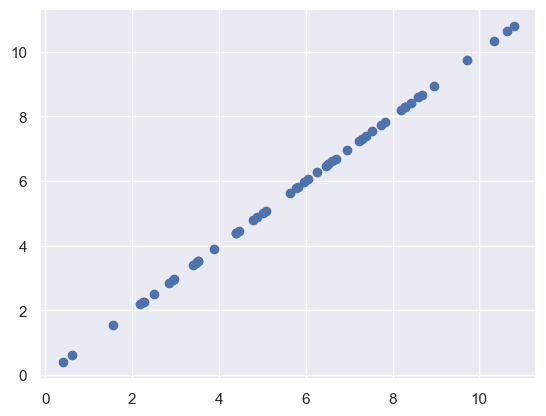

In [16]:
plt.scatter(Y_true, predictions);

In [17]:
W_histories = np.array(W_histories)
W_histories.shape

(1, 11, 3)

In [18]:
J_histories = np.array(J_histories)
J_histories.shape

(1, 11)

In [19]:
b_histories = np.array(b_histories)
b_histories.shape

(1, 11, 1)

In [20]:
jh = J_histories.ravel()
jh

array([4.70598250e+04, 2.49810147e+04, 1.38419361e+04, 7.49354550e+03,
       3.30101010e+03, 8.03964575e+02, 3.07159151e-01, 1.24038038e-01,
       4.35099805e-02, 3.90307615e-02, 3.90303616e-02])

In [21]:
bh = np.ravel(b_histories)
bh

array([3.16227766e-08, 9.78360324e-01, 1.97745517e+00, 2.97531939e+00,
       3.97489374e+00, 4.97405888e+00, 5.28555360e+00, 4.28702795e+00,
       3.29565700e+00, 3.00005505e+00, 2.99995000e+00])

In [22]:
iterations = np.array(iterations)
iterations

array([    0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,
       90000, 99999])

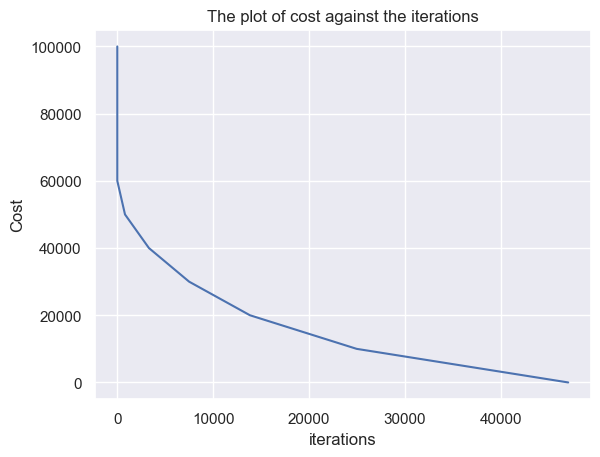

In [23]:
plt.plot(jh, iterations)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();